# Análisis exploratorio de una base de datos de películas

Usa la base de datos `./data/imdb.csv`


### 1. Importar `pandas`, `matplotlib` y `numpy`

In [8]:
import numpy as np

import matplotlib.pyplot as plt

In [9]:
import pandas as pd

### 2. Leer la base de datos del archivo csv a pandas

In [10]:
df = pd.read_csv('data/imdb.csv', encoding='latin1')

### 3. Mostrar las  primeras y últimas filas del dataframe. Hacerlo con el valor default y pasando como argumento el número entero de filas que se deseen inspeccionar.

In [11]:
df.head()
df.head(5)
df.tail(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### 4. Continúa inspeccionando el archivo viendo todas las columnas del dataframe

In [12]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### 5. Imprime los primeros valores de la variable `Rank`

In [ ]:
print(df["Rank"].head())

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64


### 6. Demuestra que es mejor tener nombres de columnas sin espacios (notación corchetes y notación punto-variable).

In [16]:
df['Runtime (Minutes)'].mean()

df_runtime = df.rename(columns={'Runtime (Minutes)': 'runtime_minutes'})
df_runtime.runtime_minutes.mean()

np.float64(113.172)

### 7. Renombra las columnas que tengan espacios

In [17]:
df.columns = df.columns.str.replace(" ", "_").str.lower()


### 8. Utiliza tus nuevas columnas sin espacios :)

In [20]:
df = df[sorted(df.columns)]
print(df.columns)


Index(['actors', 'description', 'director', 'genre', 'metascore', 'rank',
       'rating', 'revenue_(millions)', 'runtime_(minutes)', 'title', 'votes',
       'year'],
      dtype='object')


### 9. Visualiza la info de todo tu dataframe

In [21]:
pd.set_option('display.max_colwidth', None)

### 10. Inspecciona si hay columnas que tengan valores `NA`

In [22]:
df.isna().sum()[df.isna().sum() > 0]


metascore              64
revenue_(millions)    128
dtype: int64

### 11. Imprime el número total de valores NA que haya en cada columna. Hazlo primero para la columna `Metascore` y después utiliza un ciclo for para hacerlo para todas las columnas

In [27]:
df['metascore'].isna().sum()
for col in df.columns:
    if col.lower() == "metascore":
        print(col, df[col].isna().sum())


metascore 64


### 12. Usa la magia de `dropna()`

In [28]:
df.dropna()


,actors,description,director,genre,metascore,rank,rating,revenue_(millions),runtime_(minutes),title,votes,year
0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Action,Adventure,Sci-Fi",76.0,1,8.1,333.13,121,Guardians of the Galaxy,757074,2014
1,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Adventure,Mystery,Sci-Fi",65.0,2,7.0,126.46,124,Prometheus,485820,2012
2,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"Horror,Thriller",62.0,3,7.3,138.12,117,Split,157606,2016
3,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Animation,Comedy,Family",59.0,4,7.2,270.32,108,Sing,60545,2016
4,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Action,Adventure,Fantasy",40.0,5,6.2,325.02,123,Suicide Squad,393727,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
993,"Milla Jovovich, Ali Larter, Wentworth Miller,Kim Coates","While still out to destroy the evil Umbrella Corporation, Alice joins a group of survivors living in a prison surrounded by the infected who also want to relocate to the mysterious but supposedly unharmed safe haven known only as Arcadia.",Paul W.S. Anderson,"Action,Adventure,Horror",37.0,994,5.9,60.13,97,Resident Evil: Afterlife,140900,2010
994,"Thomas Mann, Oliver Cooper, Jonathan Daniel Brown, Dax Flame","3 high school seniors throw a birthday party to make a name for themselves. As the night progresses, things spiral out of control as word of the party spreads.",Nima Nourizadeh,Comedy,48.0,995,6.7,54.72,88,Project X,164088,2012
996,"Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart","Three American college students studying abroad are lured to a Slovakian hostel, and discover the grim reality behind it.",Eli Roth,Horror,46.0,997,5.5,17.54,94,Hostel: Part II,73152,2007
997,"Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani",Romantic sparks occur between two dance students from different backgrounds at the Maryland School of the Arts.,Jon M. Chu,"Drama,Music,Romance",50.0,998,6.2,58.01,98,Step Up 2: The Streets,70699,2008


### 13. Vuelve a ver la info del dataset

In [29]:
print(df)


                                                                         actors  \
0                          Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana   
1       Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron   
2              James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula   
3    Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4                            Will Smith, Jared Leto, Margot Robbie, Viola Davis   
..                                                                          ...   
995                 Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris   
996                Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart   
997               Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani   
998                Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward   
999                    Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines   

   

### 14. Genera estadísticos descriptivos con el método `describe()`

In [30]:
df.describe()


,metascore,rank,rating,revenue_(millions),runtime_(minutes),votes,year
count,936.000000,1000.000000,1000.000000,872.000000,1000.000000,1.000000e+03,1000.000000
mean,58.985043,500.500000,6.723200,82.956376,113.172000,1.698083e+05,2012.783000
std,17.194757,288.819436,0.945429,103.253540,18.810908,1.887626e+05,3.205962
min,11.000000,1.000000,1.900000,0.000000,66.000000,6.100000e+01,2006.000000
25%,47.000000,250.750000,6.200000,13.270000,100.000000,3.630900e+04,2010.000000
50%,59.500000,500.500000,6.800000,47.985000,111.000000,1.107990e+05,2014.000000
75%,72.000000,750.250000,7.400000,113.715000,123.000000,2.399098e+05,2016.000000
max,100.000000,1000.000000,9.000000,936.630000,191.000000,1.791916e+06,2016.000000


### 15. Crea un histograma de la variable Metascore. Utiliza 10 cubetas

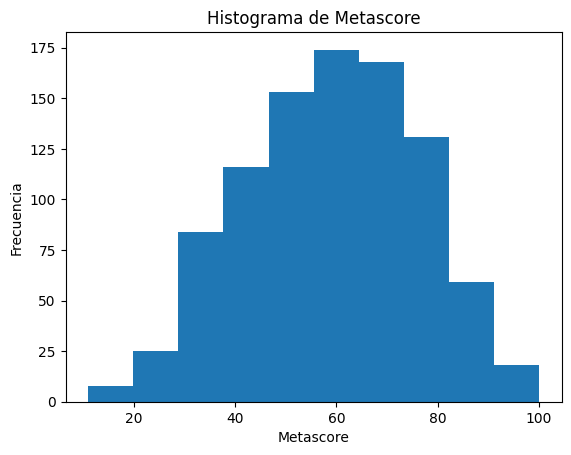

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['metascore'].dropna(),  bins=10)
plt.xlabel('Metascore')
plt.ylabel('Frecuencia')
plt.title('Histograma de Metascore')
plt.show()


### 16. Crea un histograma de la variable Rating. Utiliza 10 cubetas

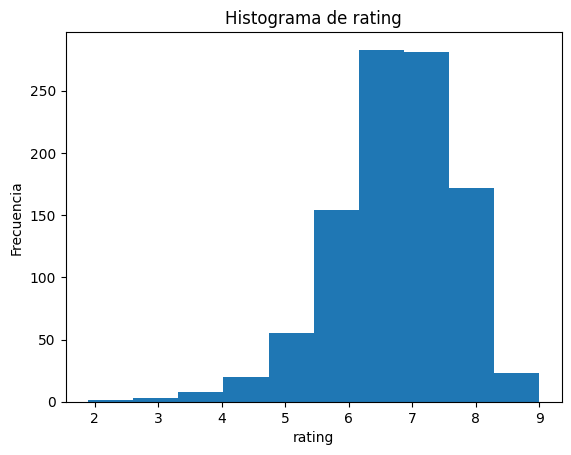

In [35]:
import matplotlib.pyplot as plt

plt.hist(df['rating'].dropna(),  bins=10)
plt.xlabel('rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de rating')
plt.show()


### 17. Vuelve a describir el dataframe y observa la media de la variable `Ratings`

In [37]:
df['rating'].mean()


np.float64(6.723199999999999)

### 18. Calcula este promedio con Numpy y después con un método de Pandas

In [43]:
df['rating'].mean()

import numpy as np
np.mean(df['rating'])


np.float64(6.723199999999999)

### 19. Obten los valores únicos de la variable Rating y después ordénalos de menor a mayor

In [45]:
df.sort_values('rating', ascending=True)


,actors,description,director,genre,metascore,rank,rating,revenue_(millions),runtime_(minutes),title,votes,year
829,"Carmen Electra, Vanessa Lachey,Nicole Parker, Matt Lanter","Over the course of one evening, an unsuspecting group of twenty-somethings find themselves bombarded by a series of natural disasters and catastrophic events.",Jason Friedberg,Comedy,15.0,830,1.9,14.17,87,Disaster Movie,77207,2008
42,"Brittany Blanton, Ayse Howard, Roman Jossart,Nadia White","A group of friends are going on a camping trip to celebrate graduating college. But once they enter the woods, the proverbial shit starts to hit the fan.",Shawn Burkett,Horror,NaN,43,2.7,NaN,73,Don't Fuck in the Woods,496,2016
871,"Justin Chatwin, James Marsters, Yun-Fat Chow, Emmy Rossum","The young warrior Son Goku sets out on a quest, racing against time and the vengeful King Piccolo, to collect a set of seven magical orbs that will grant their wielder unlimited power.",James Wong,"Action,Adventure,Fantasy",45.0,872,2.7,9.35,85,Dragonball Evolution,59512,2009
647,"Dan Crisafulli, Kay Whitney, Richard Garcia, Pat Cashman",A challenged man is stalked by tall phantoms in business suits after he purchases a car with a mysterious black credit card.,Jonathan Holbrook,"Fantasy,Horror,Thriller",57.0,648,3.2,NaN,133,Tall Men,173,2016
968,"Anna Hutchison, Andrea Whitburn, Jennifer Koenig,Michael Dickson","Best friends Emily and Lesley go on a road trip to the desert. When Emily decides to get off the highway and take a ""short cut,"" they become the target of a relentless and psychotic trucker... See full summary Â»",Micheal Bafaro,"Action,Horror,Thriller",37.0,969,3.5,NaN,83,Wrecker,1210,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
36,"Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy",A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.,Christopher Nolan,"Adventure,Drama,Sci-Fi",74.0,37,8.6,187.99,169,Interstellar,1047747,2014
249,"FranÃ§ois Cluzet, Omar Sy, Anne Le Ny, Audrey Fleurot","After he becomes a quadriplegic from a paragliding accident, an aristocrat hires a young man from the projects to be his caregiver.",Olivier Nakache,"Biography,Comedy,Drama",57.0,250,8.6,13.18,112,The Intouchables,557965,2011
80,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe","A thief, who steals corporate secrets through use of dream-sharing technology, is given the inverse task of planting an idea into the mind of a CEO.",Christopher Nolan,"Action,Adventure,Sci-Fi",74.0,81,8.8,292.57,148,Inception,1583625,2010
117,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra",Former wrestler Mahavir Singh Phogat and his two wrestler daughters struggle towards glory at the Commonwealth Games in the face of societal oppression.,Nitesh Tiwari,"Action,Biography,Drama",NaN,118,8.8,11.15,161,Dangal,48969,2016


### 20. Observa los ratings que te interesen y ahora filtra el dataframe con ese rating para ver cuáles son las películas con dicho rating

In [47]:
df[df['rating'] == 9.0]


,actors,description,director,genre,metascore,rank,rating,revenue_(millions),runtime_(minutes),title,votes,year
54,"Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, the Dark Knight must come to terms with one of the greatest psychological tests of his ability to fight injustice.",Christopher Nolan,"Action,Crime,Drama",82.0,55,9.0,533.32,152,The Dark Knight,1791916,2008


### 21. Obten los valores únicos de la variable Rating y la frecuencia total de cada uno de estos valores. Posteriormente crea un nuevo dataframe con essos valores

In [52]:
df_rating_freq = df['rating'].value_counts().sort_index().reset_index()
df_rating_freq.columns = ['rating', 'Frecuencia']
df_rating_freq


,rating,Frecuencia
0,1.9,1
1,2.7,2
2,3.2,1
3,3.5,2
4,3.7,2
5,3.9,3
6,4.0,1
7,4.1,1
8,4.2,2
9,4.3,4


### 22. Ordena el nuevo dataframe por la variable `rating`

In [53]:
df_rating_freq = df['rating'].value_counts().sort_index().reset_index()
df_rating_freq.columns = ['rating', 'Frecuencia']
df_rating_freq

,rating,Frecuencia
0,1.9,1
1,2.7,2
2,3.2,1
3,3.5,2
4,3.7,2
5,3.9,3
6,4.0,1
7,4.1,1
8,4.2,2
9,4.3,4


### 23. Crea una gráfica de barras con este nuevo dataframe ordenado

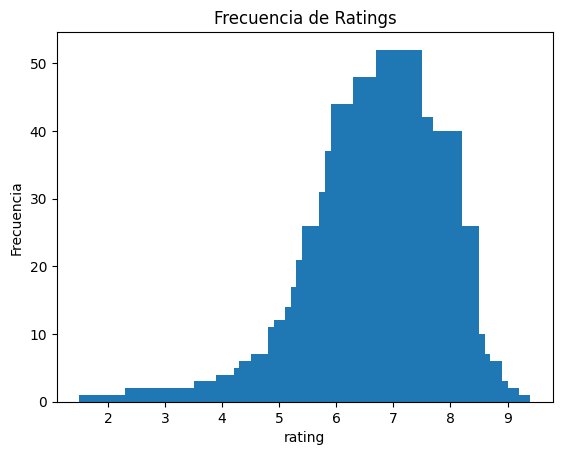

In [55]:
import matplotlib.pyplot as plt

plt.bar(df_rating_freq['rating'], df_rating_freq['Frecuencia'])
plt.xlabel('rating')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ratings')
plt.show()


### 24. Crea la matriz de correlación del dataframe de películas

In [57]:
df_num = df.select_dtypes(include=['number'])

matriz_corr = df_num.corr()
matriz_corr


,metascore,rank,rating,revenue_(millions),runtime_(minutes),votes,year
metascore,1.000000,-0.191869,0.631897,0.142397,0.211978,0.325684,-0.079305
rank,-0.191869,1.000000,-0.219555,-0.271592,-0.221739,-0.283876,-0.261605
rating,0.631897,-0.219555,1.000000,0.217654,0.392214,0.511537,-0.211219
revenue_(millions),0.142397,-0.271592,0.217654,1.000000,0.267953,0.639661,-0.126790
runtime_(minutes),0.211978,-0.221739,0.392214,0.267953,1.000000,0.407062,-0.164900
votes,0.325684,-0.283876,0.511537,0.639661,0.407062,1.000000,-0.411904
year,-0.079305,-0.261605,-0.211219,-0.126790,-0.164900,-0.411904,1.000000


### 25. Grafica la matriz de correlación utilizando `matshow()`

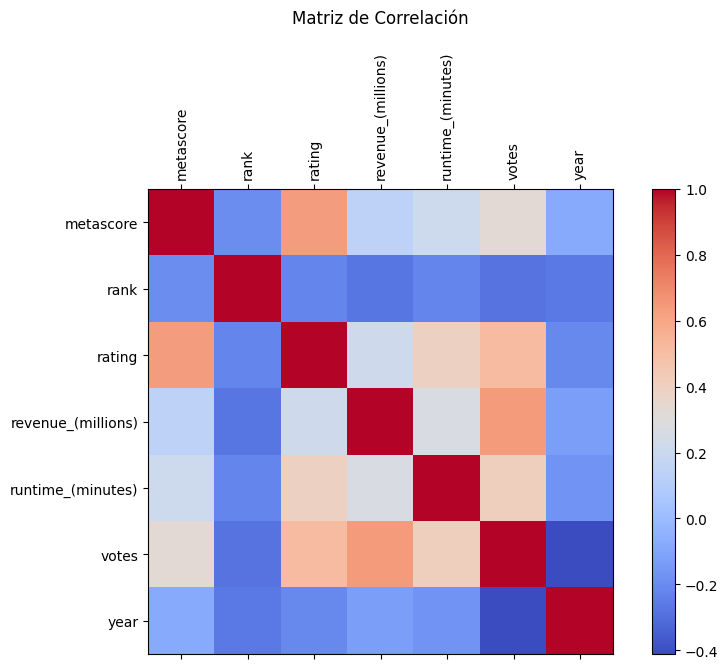

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.matshow(matriz_corr, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Matriz de Correlación', pad=20)

plt.xticks(range(len(df_num.columns)), df_num.columns, rotation=90)
plt.yticks(range(len(df_num.columns)), df_num.columns)

plt.show()
